In [250]:
from crawl_kis_and_nice_module import (import_from_mysql)

import_df = import_from_mysql(username='*****',
                            password='*****',
                            host_ip='15-152-211-160',
                            database_name='Data_Warehouse',
                            desired_table_name='credit_rank')

import_df

,corp,stock_code,sector,year,kis_bond_type,kis_rank,nice_bond_type,nice_rank,total_rank,simple_total_rank
0,AJ네트웍스,95570,서비스업,2020,SB,BBB+,None,None,BBB+,BBB
1,AJ네트웍스,95570,서비스업,2021,SB,BBB+,None,None,BBB+,BBB
2,AJ네트웍스,95570,서비스업,2022,PP,BBB+,None,None,BBB+,BBB
3,AJ네트웍스,95570,서비스업,2023,PP,BBB+,None,None,BBB+,BBB
4,CJ,1040,기타금융,2019,None,None,SB,AA-,AA-,AA
...,...,...,...,...,...,...,...,...,...,...
834,휴비스,79980,화학,2021,None,None,SB,A-,A-,A
835,휴비스,79980,화학,2022,None,None,SB,A-,A-,A
836,흥아해운,3280,운수창고업,2019,None,None,CB,B-,F,F
837,흥아해운,3280,운수창고업,2020,None,None,CB,CCC,F,F


In [251]:
# preprocess
temp_df = import_df.copy()[['corp', 'sector', 'year', 'total_rank', 'simple_total_rank']]

temp_df['simple_total_rank'] = temp_df['simple_total_rank'].replace('F', 1 \
                                                          ).replace('BB', 2 \
                                                          ).replace('BBB', 3 \
                                                          ).replace('A', 4 \
                                                          ).replace('AA', 5 \
                                                          ).replace('AAA', 6)

temp_df['total_rank'] = temp_df['total_rank'].replace('F', 1 \
                                            ).replace('BB-', 2 \
                                            ).replace('BB', 3 \
                                            ).replace('BB+', 4 \
                                            ).replace('BBB-', 5 \
                                            ).replace('BBB', 6 \
                                            ).replace('BBB+', 7 \
                                            ).replace('A-', 8 \
                                            ).replace('A', 9 \
                                            ).replace('A+', 10 \
                                            ).replace('AA-', 11 \
                                            ).replace('AA', 12 \
                                            ).replace('AA+', 13 \
                                            ).replace('AAA', 14)
  
temp_df.rename(columns = {'simple_total_rank' : '등급'}, inplace = True)

temp_df


,corp,sector,year,total_rank,등급
0,AJ네트웍스,서비스업,2020,7,3
1,AJ네트웍스,서비스업,2021,7,3
2,AJ네트웍스,서비스업,2022,7,3
3,AJ네트웍스,서비스업,2023,7,3
4,CJ,기타금융,2019,11,5
...,...,...,...,...,...
834,휴비스,화학,2021,8,4
835,휴비스,화학,2022,8,4
836,흥아해운,운수창고업,2019,1,1
837,흥아해운,운수창고업,2020,1,1


In [252]:
# 패키지
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 출력
import matplotlib
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rc('font', family='Malgun Gothic')

# 마이너스 부호
matplotlib.rcParams['axes.unicode_minus'] = False

# ggplot
plt.style.use ('ggplot')

# 데이터 시각화 1

- 최근 5년 간 KOSPI에 상장된 기업은 대체로 A 이상의 신용평가등급을 보이는 것으로 확인
- 신용평가등급은 신용평가년도와 관계없이 일정한 비율을 보이는 것으로 확인
- KOSPI에 상장된 기업은 2022년에 가장 많은 신용평가를 받았으며, 2019년에 가장 적은 신용평가를 받은 것으로 확인

year
2022    186
2021    179
2023    168
2020    164
2019    142
dtype: int64


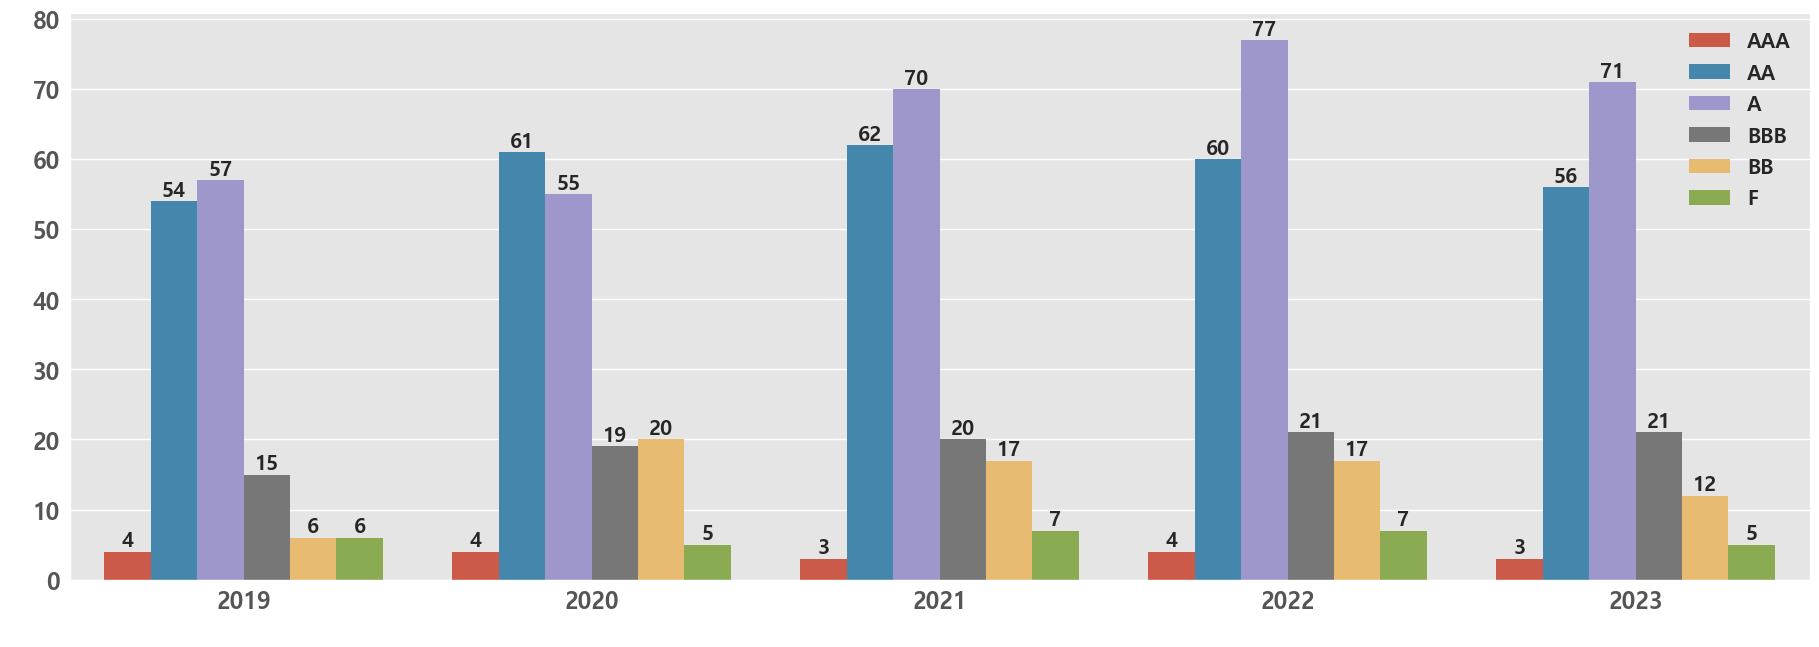

In [284]:
# visualization 1
print(temp_df.value_counts('year'))

rank_list1 = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'F']
rank_list2 = ['AAA', 'AA', 'A','BBB', 'BB', 'F']

plt.figure(figsize=(20, 7))

counts = sns.countplot(data = temp_df,
              x = 'year',
              hue = '등급',
              hue_order = [6, 5, 4, 3, 2, 1])

plt.legend(rank_list2, loc='upper right', prop={'size': 15, 'weight' : 'bold'})
plt.xticks(size = 17, fontweight = 'bold')
plt.yticks(size = 17, fontweight = 'bold')
plt.xlabel(' ')
plt.ylabel(' ')

for i, p in enumerate(counts.patches):
    counts.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height(), '.0f'), ha='center', va='bottom', fontsize = 15, fontweight = 'bold')

plt.show()

# 데이터 시각화 2

- 최근 5년 간 KOSPI에 상장된 기업 중 신용평가를 가장 많이 받은 업종은 '화학'이며, '유통업', '기타금융', '전기전자', '운수장비' 순으로 많은 것으로 나타났다.
- '화학' 기업은 대체적으로 A등급을 받은 것으로 확인되었으며, '유통업' 기업은 대게 'AA'등급을 받은 것으로 확인되었다.
- 신용평가 시 위험 고려대상에 해당하는 'F등급'(B 미만)에 해당하는 기업은 '운수창고업', '전기전자', '유통업', '운수장비', '의약품', '종이목재'에 속하는 것으로 나타났다.

In [ ]:
# visualization 2
print(temp_df.value_counts('sector'))

fig = plt.figure(figsize=(20, 7))
fig.patch.set_facecolor('lightgray')
fig.tight_layout()

counts = sns.countplot(data = temp_df,
              x = 'sector',
              hue = '등급',
              hue_order = [6, 5, 4, 3, 2, 1])

plt.legend(rank_list2, loc='upper right', prop={'size': 15, 'weight':'bold'})
plt.xticks(size = 14, fontweight = 'bold', rotation = 45)
plt.yticks(size = 14, fontweight = 'bold')

for i, p in enumerate(counts.patches):
    counts.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height(), '.0f'), ha='center', va='bottom', fontsize = 9, fontweight = 'bold')

plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

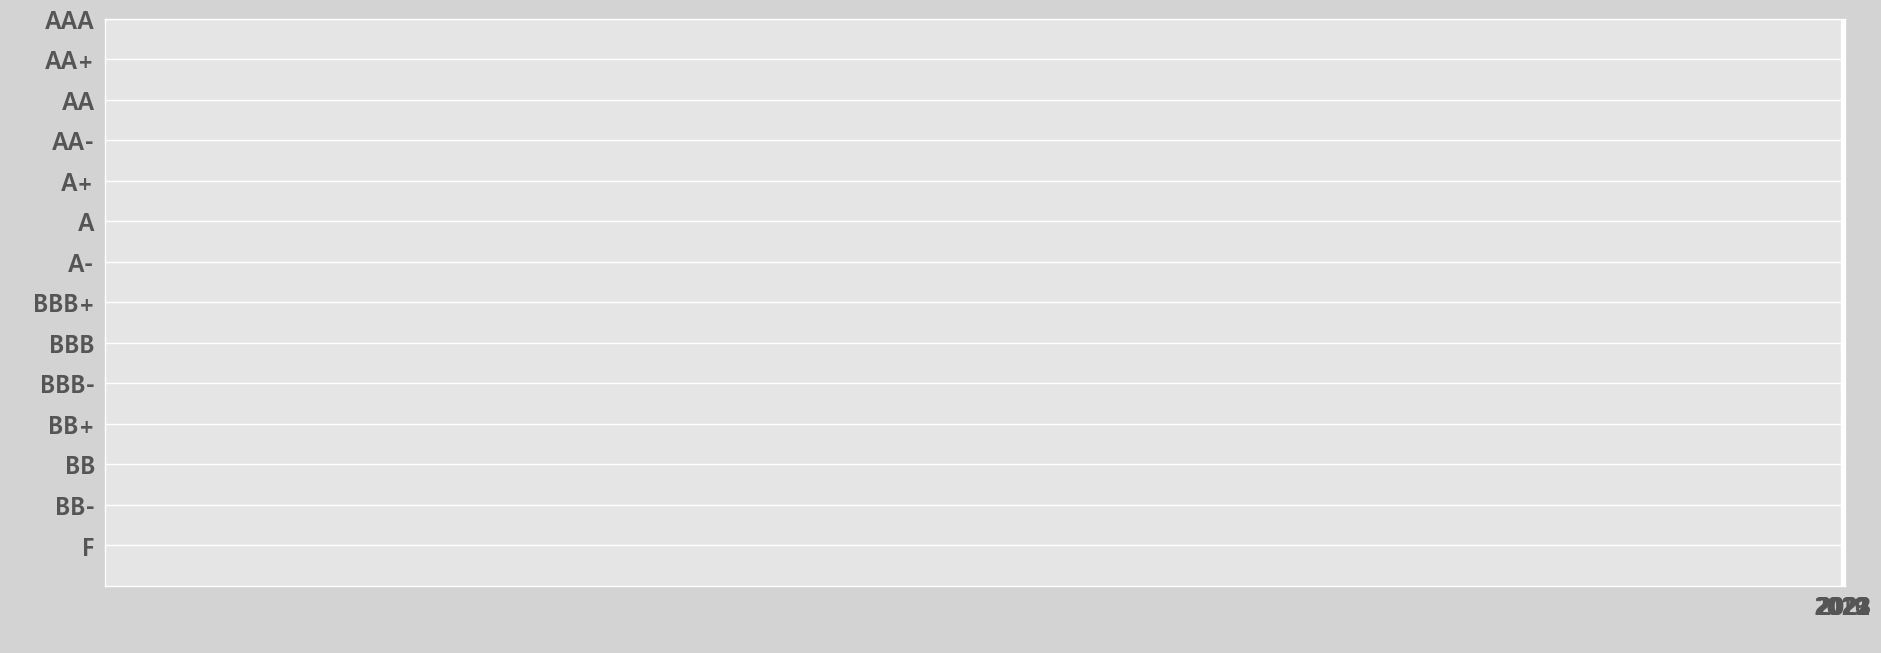

In [255]:
# visualization 3

fig = plt.figure(figsize=(20, 7))
fig.patch.set_facecolor('lightgray')
fig.tight_layout()

sns.lineplot(data = temp_df[temp_df['corp'] == corp_name],
              x = 'year',
              y = 'total_rank')

plt.title(corp_name, size = 17, fontweight = 'bold')
plt.xticks([2019, 2020, 2021, 2022, 2023], size = 17, fontweight = 'bold')
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], rank_list1[::-1], size = 17, fontweight = 'bold')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()